In [1]:
%cd /content/drive/MyDrive/cakd7/강의/m9_딥러닝기본

/content/drive/MyDrive/cakd7/강의/m9_딥러닝기본


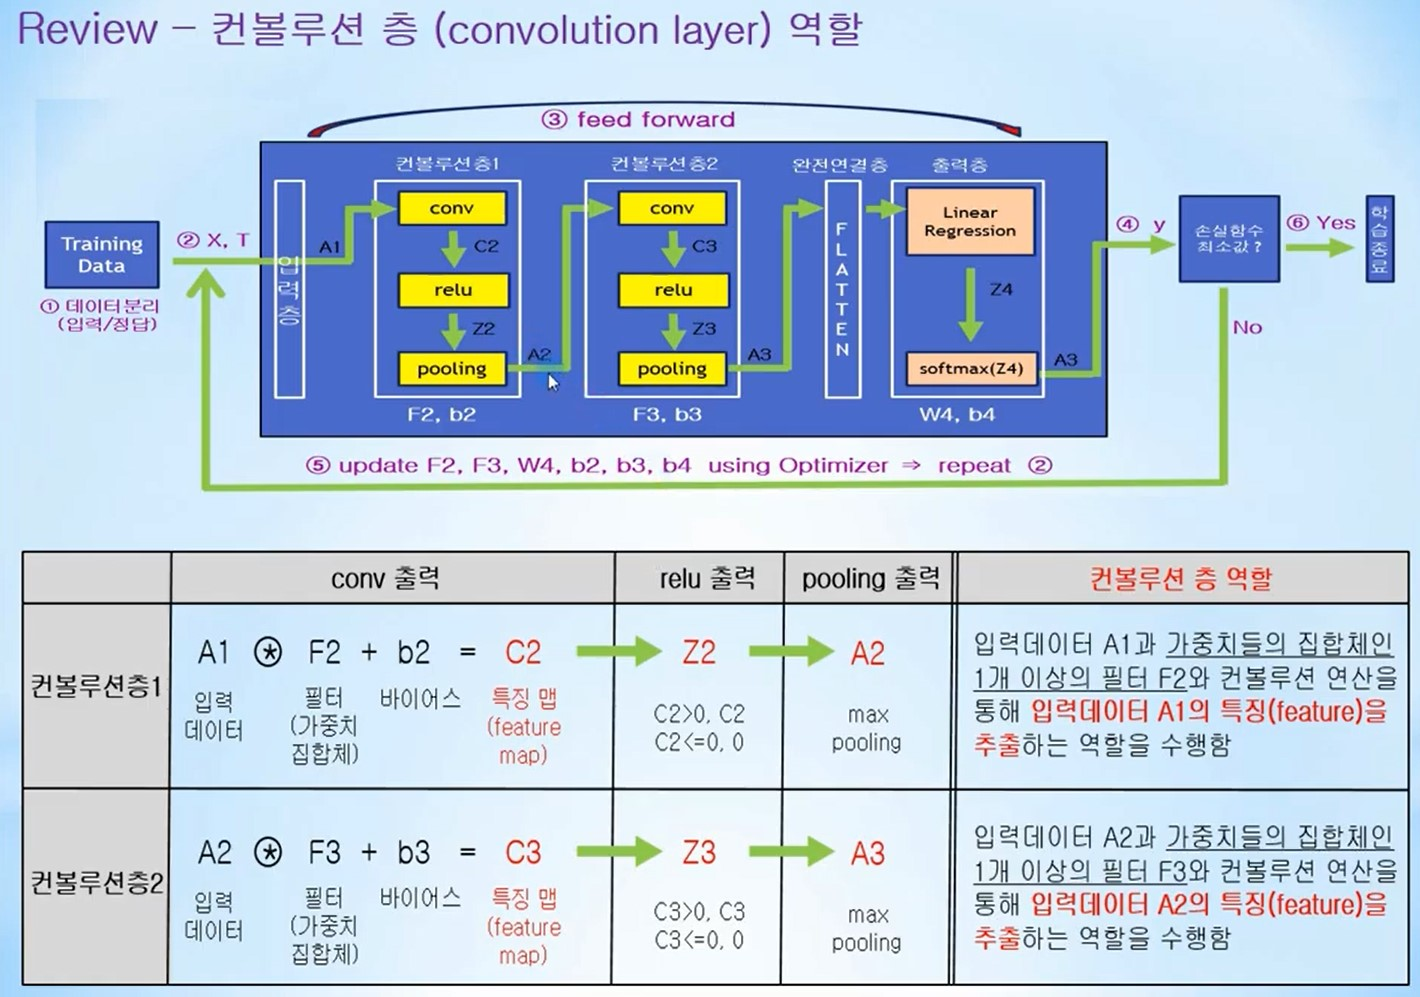

In [2]:
from IPython.display import Image
Image('cnn.jpg')

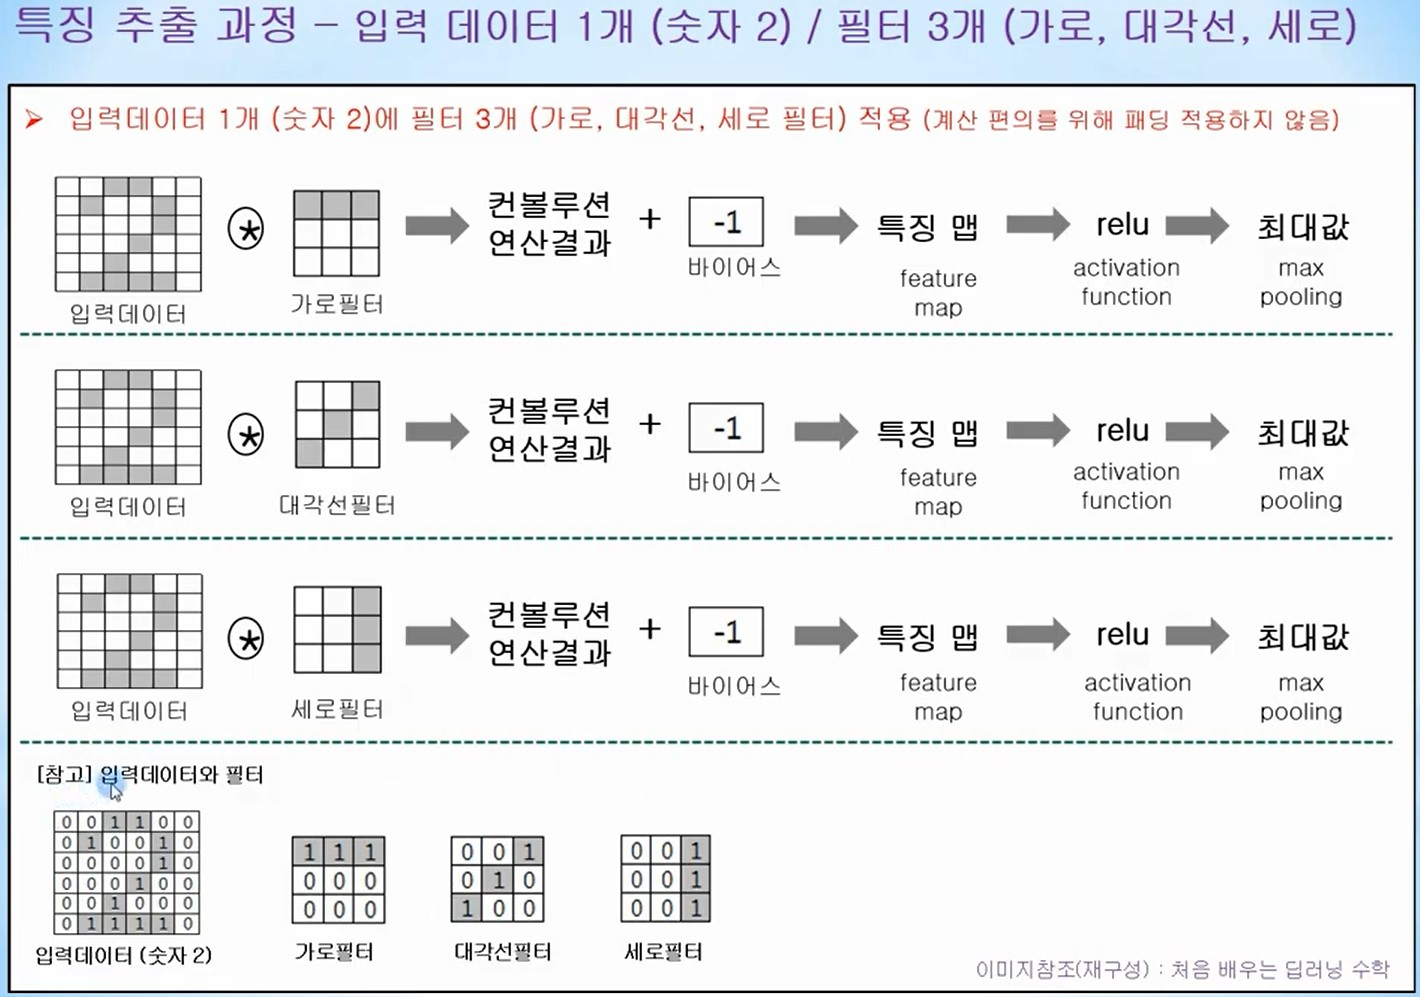

In [3]:
from IPython.display import Image
Image('cnn2.jpg')

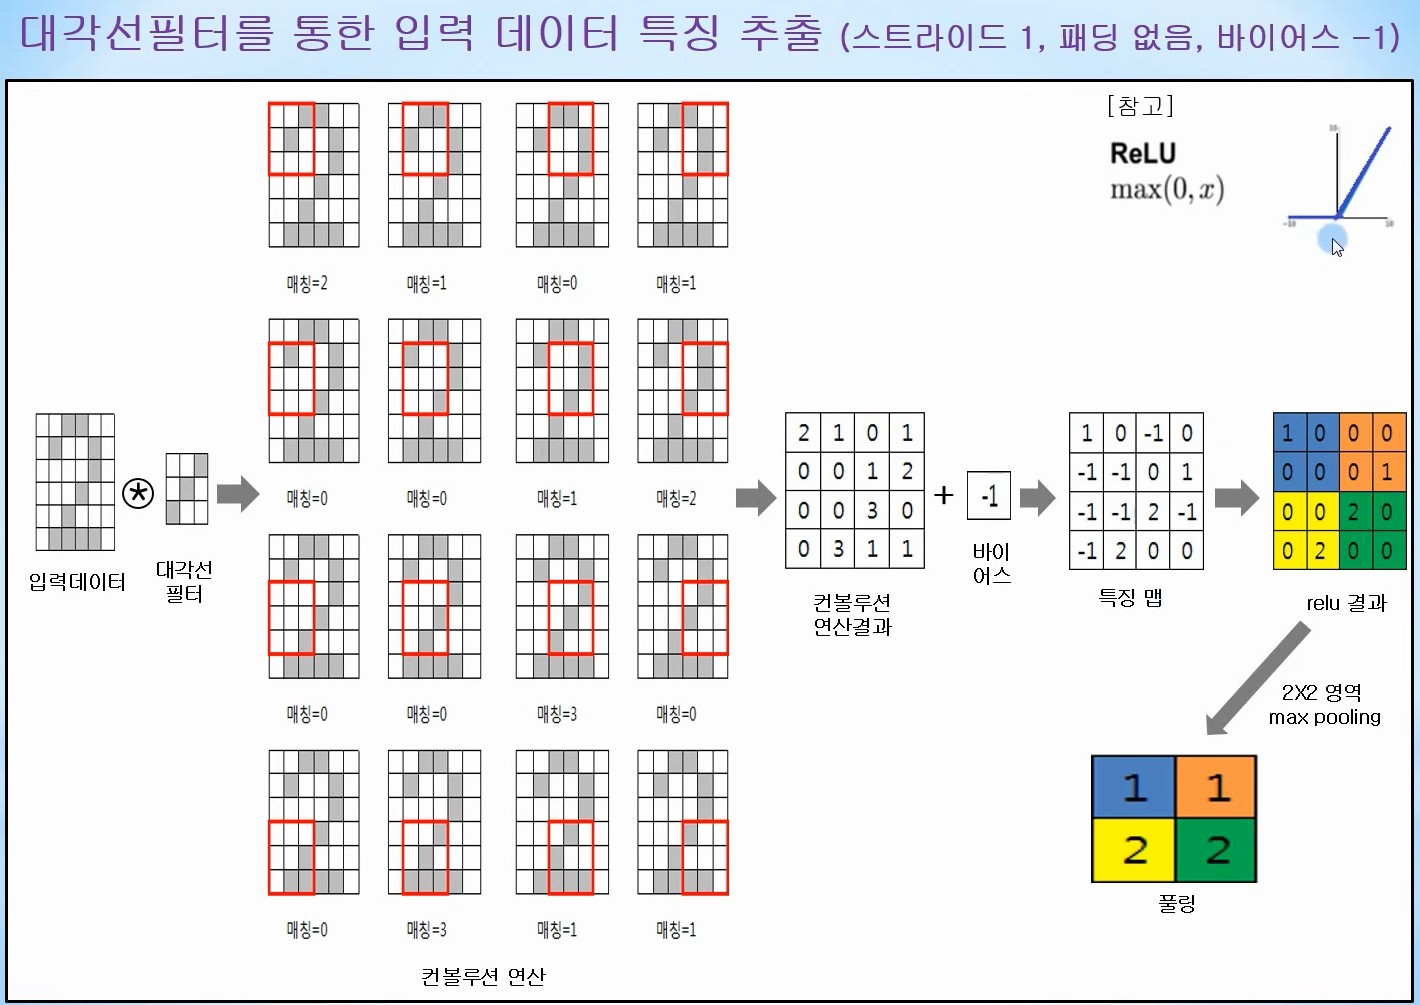

In [4]:
from IPython.display import Image
Image('cnn3.jpg')

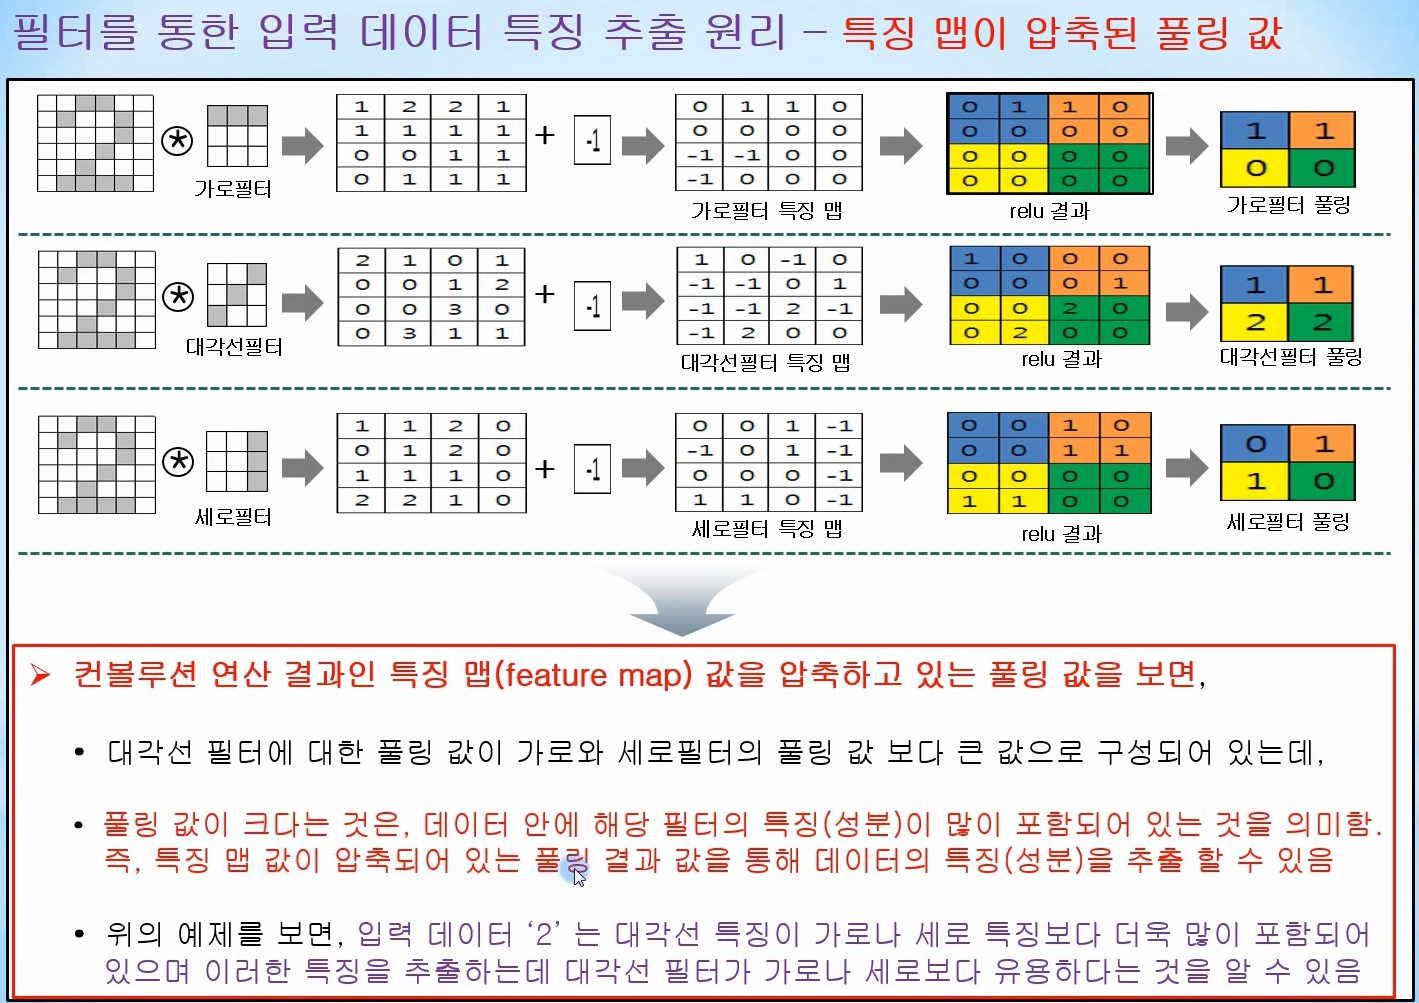

In [5]:
from IPython.display import Image
Image('cnn5.jpg')

In [6]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1))) # 3 x 3 필터 32개
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [10]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255 # 0과 1사이의 값을 가지는 float타입으로 변환

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


11490434/11490434 [==============================] - 0s 0us/step


In [11]:
model.compile(optimizer='rmsprop', # 임력된 데이터와 손실함수를 기반으로 네트워크를 업데이터하는 메커니즘
              loss='categorical_crossentropy', # 신경망의 성능을 측정하는 방법으로 네트워크가 옳은 방향으로 학습
              metrics=['accuracy']) # 훈련과 테스트 과정을 모니터링할 지표
model.fit(train_images, train_labels, epochs=5, batch_size=64)


Epoch 1/5
938/938 [==============================] - 14s 4ms/step - loss: 0.1698 - accuracy: 0.9472
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0464 - accuracy: 0.9855
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0331 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0240 - accuracy: 0.9925
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0192 - accuracy: 0.9942


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0296 - accuracy: 0.9915


0.9915000200271606

In [13]:
%cd /content/drive/MyDrive/colab_lecture/datasets

/content/drive/MyDrive/colab_lecture/datasets


In [14]:
!ls

100			       genre-tfidf.dic
101			       glove.6B.100d.txt
103			       jena_climate
105			       labeledTrainData.tsv
aclImdb			       __MACOSX
aclImdb.zip		       original_photo_deep_dream.jpg
cats_and_dogs		       popova.jpg
cats_and_dogs_small	       portrait.png
creative_commons_elephant.jpg  __pycache__
elephant_cam.jpg	       ratings_test.txt
final_dream.png		       ratings_train.txt
genre-model.hdf5	       ratings.txt
genre.pickle		       tfidf.py


In [15]:
!pwd

/content/drive/MyDrive/colab_lecture/datasets


In [16]:
import os, shutil
base_dir = 'cats_and_dogs_small'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

test_cats_dir = os.path.join(test_dir,'cats')
test_dogs_dir = os.path.join(test_dir,'dogs')

In [19]:
print('훈련용 고양이 이미지 개수:', len(os.listdir(train_cats_dir)))

훈련용 고양이 이미지 개수: 1000


In [20]:
print('훈련용 강아지 이미지 개수:', len(os.listdir(train_dogs_dir)))

훈련용 강아지 이미지 개수: 1000


In [21]:
print('검증용 고양이 이미지 개수:', len(os.listdir(validation_cats_dir)))

검증용 고양이 이미지 개수: 500


In [22]:
print('검증용 강아지 이미지 개수:', len(os.listdir(validation_dogs_dir)))

검증용 강아지 이미지 개수: 500


In [23]:
print('테스트용 고양이 이미지 개수:', len(os.listdir(test_cats_dir)))

테스트용 고양이 이미지 개수: 500


In [24]:
print('테스트용 강아지 이미지 개수:', len(os.listdir(test_dogs_dir)))

테스트용 강아지 이미지 개수: 500
